In [1]:
"""
Extract stock price records from external API, to save as cookie jar bundle size data.
"""

from finrl.marketdata.yahoodownloader import YahooDownloader
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm

START_DATE = '2010-01-01'
END_DATE = '2020-01-01'
# Dow 30 stocks as of Sept 2012
STOCK_NAMES = [
    'MMM', 'AA', 'AXP', 'T', 'BAC', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 
    'DD', 'XOM', 'GE', 'HPQ', 'HD', 'INTC', 'IBM', 'JNJ', 'JPM', 'MCD',
    'MRK', 'MSFT', 'PFE', 'PG', 'TRV', 'UNH', 'RTX', 'VZ', 'WMT', 'DIS',
]

In [2]:
df = YahooDownloader(
    start_date = START_DATE,
    end_date = END_DATE,
    ticker_list = STOCK_NAMES,
).fetch_data()

df['time_id'] = (pd.to_datetime(df.date) - pd.Timestamp(START_DATE)).apply(lambda x: x.days)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
df

,date,open,high,low,close,volume,tic,day,time_id
0,2010-01-04,39.577412,40.586670,39.409199,36.897526,10773783,AA,0,3
1,2010-01-04,40.810001,41.099998,40.389999,34.145294,6894300,AXP,0,3
2,2010-01-04,55.720001,56.389999,54.799999,43.777554,6186700,BA,0,3
3,2010-01-04,15.240000,15.750000,15.120000,13.406421,180845200,BAC,0,3
4,2010-01-04,57.650002,59.189999,57.509998,42.120872,7325600,CAT,0,3
...,...,...,...,...,...,...,...,...,...
75475,2019-12-31,136.309998,136.990005,136.130005,130.344666,765100,TRV,1,3651
75476,2019-12-31,293.660004,294.089996,291.149994,285.210083,2224200,UNH,1,3651
75477,2019-12-31,61.209999,61.400002,60.939999,55.606384,8466700,VZ,1,3651
75478,2019-12-31,119.500000,119.800003,118.190002,115.059013,4912000,WMT,1,3651


75480it [00:27, 2721.85it/s]


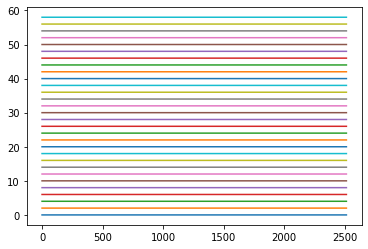

In [25]:
# Visual check for any missing data points
existing_time_ids = np.sort(df.time_id.unique())
arr_missing = np.full((len(existing_time_ids), 1 + len(STOCK_NAMES)), True)
for i, row in tqdm(df.iterrows()):
    # import pdb; pdb.set_trace()
    ind_time_id = list(existing_time_ids).index(row.time_id)
    ind_stock = 1 + STOCK_NAMES.index(row.tic)
    arr_missing[ind_time_id, ind_stock] = False

for i in range(len(STOCK_NAMES)):
    num_missing = np.sum(arr_missing[:, 1 + i])
    if num_missing != 0:
        print(f'{STOCK_NAMES[i]} has {num_missing} missing points.')

for i in range(len(STOCK_NAMES)):
    plt.plot(2 * i + arr_missing[:, i + 1])

Confirmed no missing data!

In [35]:
# now, save into a dataframe
res = pd.DataFrame(columns=['time_id'] + STOCK_NAMES, dtype=float)
res['time_id'] = np.sort(df.time_id.unique())

,time_id,MMM,AA,AXP,T,BAC,BA,CAT,CVX,CSCO,...,MRK,MSFT,PFE,PG,TRV,UNH,RTX,VZ,WMT,DIS
0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,3644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2512,3646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2513,3647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2514,3650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
time_id_to_ind = {t: i for i, t in enumerate(existing_time_ids)}

for i, row in tqdm(df.iterrows()):
    ind_time_id = time_id_to_ind[row.time_id]
    ind_stock = 1 + STOCK_NAMES.index(row.tic)
    res.iloc[ind_time_id, ind_stock] = row.open

75480it [00:56, 1335.28it/s]


In [59]:
res

,time_id,MMM,AA,AXP,T,BAC,BA,CAT,CVX,CSCO,...,MRK,MSFT,PFE,PG,TRV,UNH,RTX,VZ,WMT,DIS
0,3,83.089996,39.577412,40.810001,28.410000,15.240000,55.720001,57.650002,78.199997,24.110001,...,35.133587,30.620001,17.333965,61.110001,50.150002,31.379999,44.185020,31.325493,53.740002,32.500000
1,4,82.800003,40.442490,40.830002,28.700001,15.740000,56.250000,58.549999,79.220001,24.600000,...,35.591602,30.850000,17.950665,61.130001,49.630001,31.730000,45.084957,31.297356,54.090000,32.070000
2,5,83.879997,39.192928,41.230000,27.950001,16.209999,58.230000,59.180000,79.440002,24.540001,...,35.505726,30.879999,17.703985,60.939999,48.259998,31.600000,44.405285,30.612698,53.500000,31.900000
3,6,83.320000,39.697559,41.259998,27.580000,16.680000,59.509998,59.299999,79.360001,24.299999,...,35.753819,30.629999,17.685009,60.580002,47.820000,31.590000,44.059158,30.106237,53.720001,31.770000
4,7,83.690002,39.553379,41.759998,27.290001,16.980000,61.540001,59.250000,79.120003,24.379999,...,36.135494,30.280001,17.666035,60.360001,48.650002,32.860001,44.216488,29.693565,53.430000,31.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,3644,178.270004,21.610001,124.949997,39.099998,35.189999,339.510010,148.699997,120.430000,48.160000,...,87.442749,157.479996,37.314991,124.790001,136.449997,295.260010,94.443047,61.459999,119.129997,144.580002
2512,3646,176.449997,21.500000,124.980003,38.990002,35.320000,332.700012,147.899994,120.669998,47.779999,...,87.404579,157.559998,37.286530,125.099998,135.960007,295.299988,94.367523,61.279999,119.610001,145.399994
2513,3647,176.649994,21.410000,125.839996,39.240002,35.700001,330.200012,148.639999,120.889999,47.990002,...,87.480919,159.449997,37.409866,125.559998,136.479996,296.010010,95.028320,61.389999,119.940002,146.050003
2514,3650,177.259995,21.700001,125.199997,39.270000,35.570000,330.500000,148.419998,120.440002,47.750000,...,87.337784,158.990005,37.286530,125.760002,136.979996,296.049988,94.675896,61.650002,119.800003,145.750000


In [70]:
res.to_csv('stocks_data.csv', index=False)